# Task 4 - Fire Evacuation Planning for the MI Building

In [173]:
%load_ext autoreload
%autoreload 2

from helpers.vae import VariationalAutoEncoder
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from helpers.data import get_fire_evac_dataset
from helpers.plots import plot_2d_train_test
from helpers.plots import plot_2d_fire_evac_set

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Loading the dataset and visualizing it

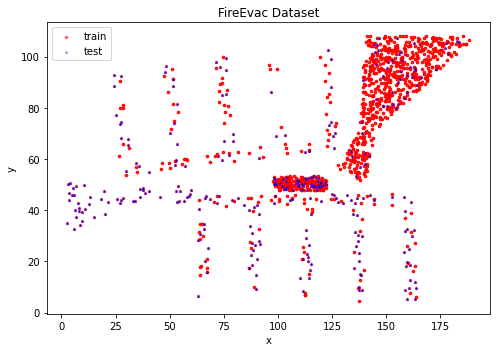

In [174]:
train, test = get_fire_evac_dataset()
plot_2d_train_test(
    train, test, xlabel="x", ylabel="y", title="FireEvac Dataset", save_path="plots/fire_evac_data.pdf", alpha=0.5
)

### 2. Training a VAE

In [175]:
# Data & model configuration
latent_dim = 2
batch_size = 64
hidden_size = 64
no_epochs = 200
verbosity = 1
num_channels = 1
input_shape = train[0].shape

In [176]:
# preprocess data to be in range [0,1]
def normalise(data):
    factor = data.max()
    data_normalised = data / factor
    return data_normalised

def renormalise(data_normalised, data):
    factor = data.max()
    data_renormalised = data_normalised * factor
    return data_renormalised

train_normalised = normalise(train)
test_normalised = normalise(test)

In [177]:
vae = VariationalAutoEncoder(input_shape=input_shape, latent_dim=latent_dim, hidden_size=hidden_size)

In [178]:
# Compile VAE
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=50)
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
vae.compile(optimizer=opt)
# Train autoencoder
history = vae.fit(train_normalised, train_normalised, epochs=no_epochs, batch_size=batch_size, validation_data=(test_normalised, test_normalised), callbacks=[early_stopping])

Epoch 1/200
47/47 [==============================] - 1s 5ms/step - loss: 141.3909 - val_loss: 62.9851
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 34.3533 - val_loss: 42.6037
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 18.4429 - val_loss: 28.5929
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 13.0109 - val_loss: 22.0568
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 10.7651 - val_loss: 19.6916
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 8.9377 - val_loss: 15.8948
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 7.7742 - val_loss: 14.8357
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 7.2286 - val_loss: 12.8011
Epoch 9/200
47/47 [==============================] - 0s 2ms/step - loss: 6.9338 - val_loss: 11.8534
Epoch 10/200
47/47 [==============================] - 0s 2ms/step - loss: 6.6442 - val_loss: 1

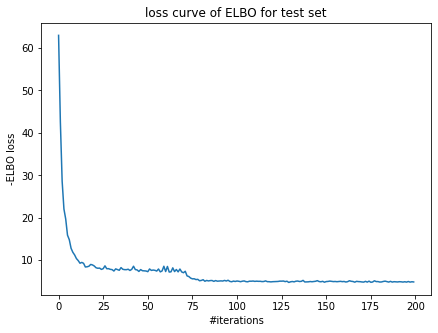

In [179]:
# print loss history
loss_history = history.history['val_loss']

plt.plot(loss_history)
plt.title("loss curve of ELBO for test set")
plt.xlabel('#iterations')
plt.ylabel('-ELBO loss')
plt.show()

### 3. Plot of the reconstructed test set

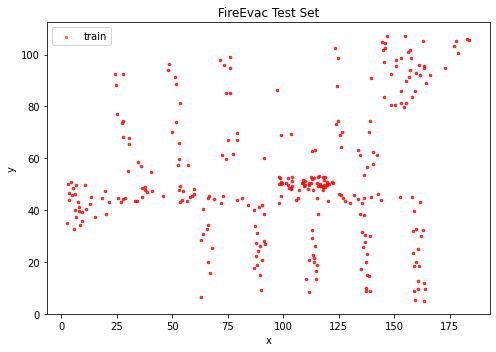

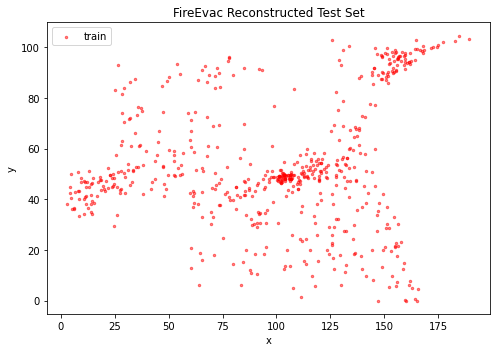

In [180]:
plot_2d_fire_evac_set(test, xlabel="x", ylabel="y", title="FireEvac Test Set", save_path="plots/fire_evac_test_data.pdf", alpha=0.5)

test_reconstructed = np.empty_like(test_normalised)
for i in range(test_normalised.shape[0]):
    _, _, z = vae.encoder(test_normalised[i-1].reshape(-1, 2))
    test_sample = vae.decoder(z)[0]
    test_reconstructed[i-1] = test_sample

test_reconstructed = renormalise(test_reconstructed, test)
plot_2d_fire_evac_set(test_reconstructed, xlabel="x", ylabel="y", title="FireEvac Reconstructed Test Set", save_path="plots/fire_evac_test_data_reconstruction.pdf", alpha=0.5)

### 4. Plot of generated samples

1.0776827335357666


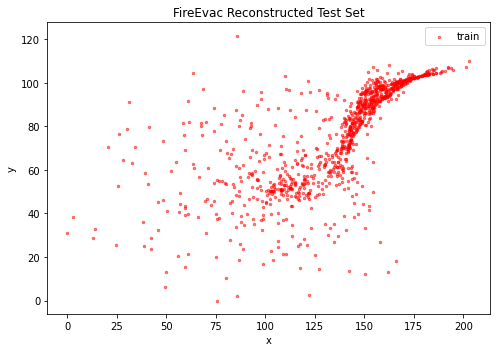

In [185]:
# TODO
# randomly choose input for decoder
# decode
# plot generated samples with plot fire evac set

def generate_samples(num_samples):
    """
    Visualises generation of num_samples digits

    Args:
        num_samples (int): number of samples to be generated

    Returns: array of sampled data
    """
    generated_samples = np.empty(shape=(num_samples, 2))
    for i in range(num_samples):
        z_sample = np.random.normal(size=latent_dim) 
        out = vae.decoder(np.array([z_sample]))[0]
        generated_samples[i] = out
    return generated_samples

generated_samples = generate_samples(1000)
print(generated_samples.max())
generated_samples = renormalise(generated_samples, train)

plot_2d_fire_evac_set(generated_samples, xlabel="x", ylabel="y", title="FireEvac Reconstructed Test Set", save_path="plots/fire_evac_test_data_generation.pdf", alpha=0.5)

### 5. Generate data to estimate the critical number of people for the MI building

In [182]:
# TODO
# randomly choose input for decoder: determine num_samples?
# answer question how many people fit in the MI building, number at main entrance > 100 ? Count!


### Bonus:

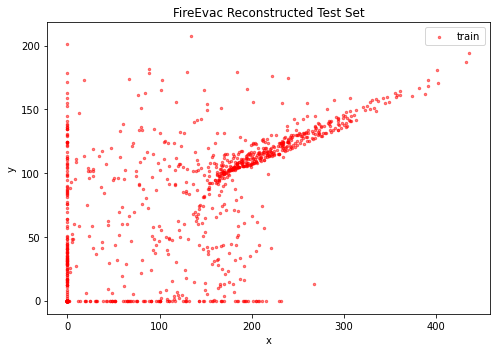

In [183]:
# generation of 100 people in the MI building
generated_positions = generate_samples(100)
generated_positions = renormalise(generated_positions, train)

plot_2d_fire_evac_set(generated_samples, xlabel="x", ylabel="y", title="FireEvac Reconstructed Test Set", save_path="plots/fire_evac_test_data_generation_bonus.pdf", alpha=0.5)